Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [108]:
NAME = "Noah Hill"
COLLABORATORS = ""

---

# DS320 Spring 2023: project 04

<b> posted on Tue 04/11/23, due date is Thu 03/20/23, at 8:00 AM </b>

# Data visualization to explore the housing dataset

In this project, imagine that you will predict the median value of houses for each district in California given the housing dataset.

You will visualize the housing dataset to explore 

#1 the correlations of nummeric features, the relationships between each feature and the median house value, 

#2 the distributions of features to make transformations if needed,

Here you work on the housing dataset you already downloaded when we learnt about "how to work with data sources". You need to prepare your data and choose the right plot for each task.

You have your freedom to use matplotlib, pandas, and seaborn as you like

Note: (1) you should create the data for each task, do NOT change the origrinal dataframe for tasks

(2) I will mannually grade your code, so no test case will be provided, but I can give you the expectation of the outcomes for each task.


# Import libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib

# Data preparation
You need to read the housing dataset into a dataframe and name it as `df_housing`.

You should create a sub dataset from the `df_housing` for each of following tasks if there is a need

In [4]:
# YOUR CODE HERE
df_housing = pd.read_csv('housing.csv')
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Task 1: Data distributions

We want to see how the values of data features spead out.

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 1](./images/task1.png)

/tmp/ipykernel_2184376/2053670932.py:21: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  t01 = df_housing.hist(ax = axes, bins=50, color = 'green', alpha = 0.5)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

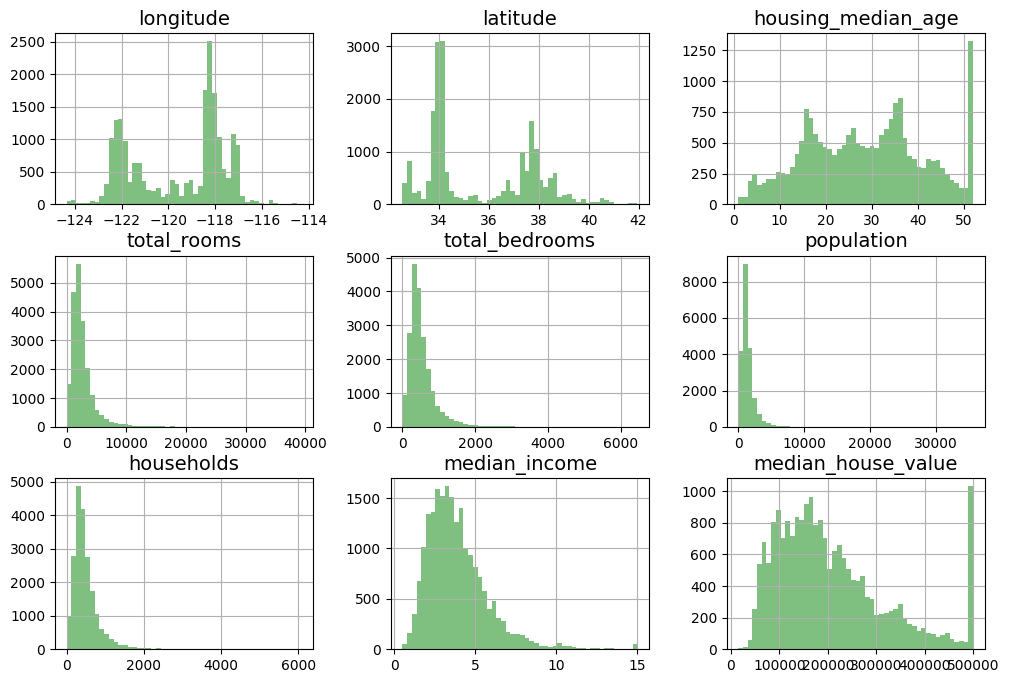

In [17]:
# YOUR CODE HERE

#dfhousingtaskone = plt.hist((bins = 50, figsize(20,15), df_housing,))
#histplots = df_housing.hist(bins = 50)
#plt.savefig('attribute_histograms_plots.png')
#plt.figure(figsize=(20,15))
#plt.show()


fig = plt.figure(figsize = (12,8))
axes = fig.add_subplot()


plt.rc('font', size=13)
plt.rc('axes', labelsize=10, titlesize=14)
plt.rc('legend', fontsize=13)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


t01 = df_housing.hist(ax = axes, bins=50, color = 'green', alpha = 0.5)
t01



## Task 2: Catergory Distribution

We want to catergorize the median income in ranges and compute how many districts for each catergory.

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 2](./images/task2.png)

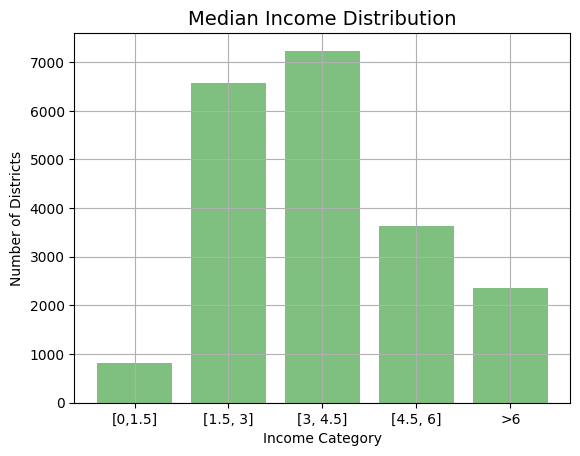

In [23]:
# YOUR CODE HERE
bins = [0, 1.5, 3, 4.5, 6, float('inf')] 
labels = ['[0,1.5]', '[1.5, 3]', '[3, 4.5]', '[4.5, 6]', '>6'] 

df_housing['income_cat'] = pd.cut(df_housing['median_income'], bins=bins, labels=labels)

income_counts = df_housing['income_cat'].value_counts(sort=False)

plt.bar(income_counts.index, income_counts, align='center', color='green',alpha = 0.5)


plt.xlabel('Income Category')
plt.ylabel('Number of Districts')
plt.title('Median Income Distribution')

plt.grid()

plt.show()

## Task 3: Correlation exploration

We want to see the correlations between every two data features

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 3](./images/task3.png)

<Figure size 640x480 with 0 Axes>

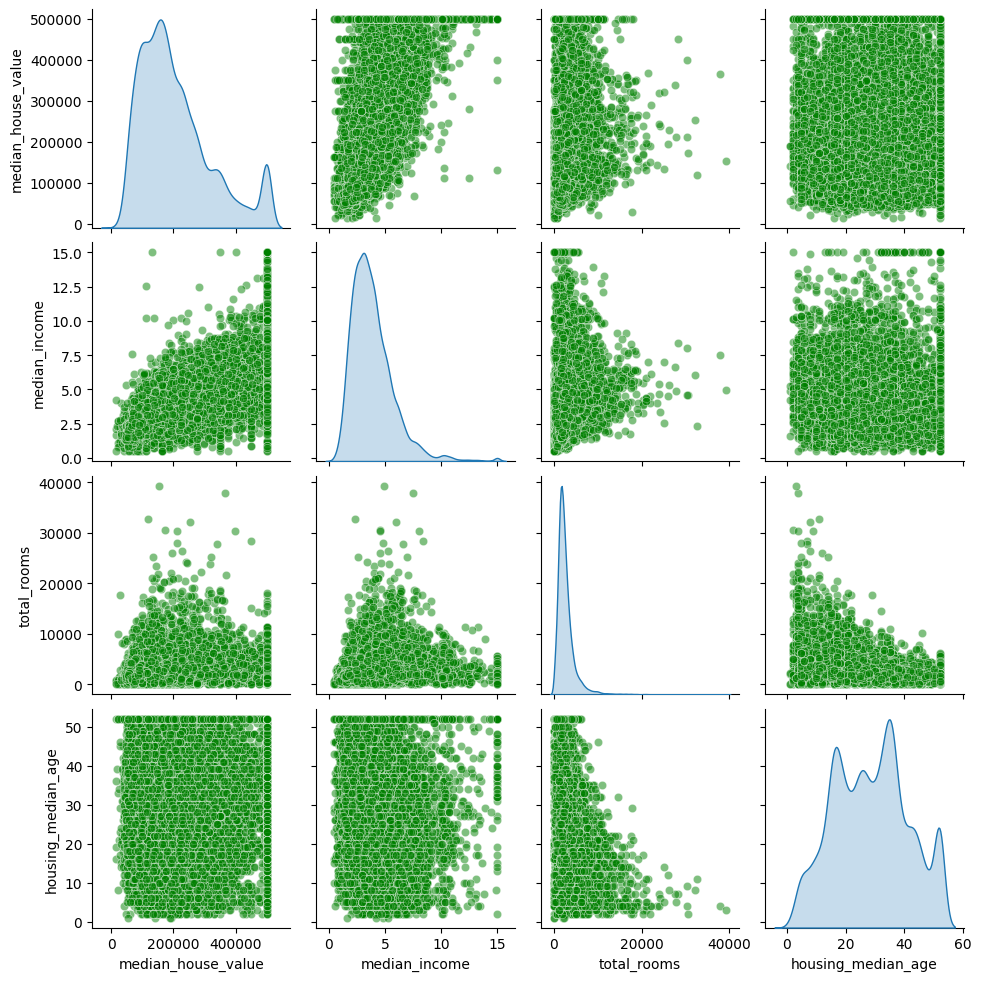

In [26]:
# YOUR CODE HERE
columns = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
df_subset = df_housing[columns]

fig = plt.figure()
#task= pd.plotting.scatter_matrix(df_subset, figsize=(10, 10), alpha=0.9, diagonal='kde',marker="o", color='green')
seaborn_task = seaborn.pairplot(df_subset, diag_kind="kde", 
             plot_kws={"alpha": 0.5, "color": 'green'})
plt.show(seaborn_task)

## Task 4: median_income vs. median_house_value

Looking at the correlation scatterplots, it seems like the most promising attribute to predict the median house value is the median income, so let’s zoom in on their scatterplot.

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 4](./images/task4.png)


<Axes: xlabel='median_income', ylabel='median_house_value'>

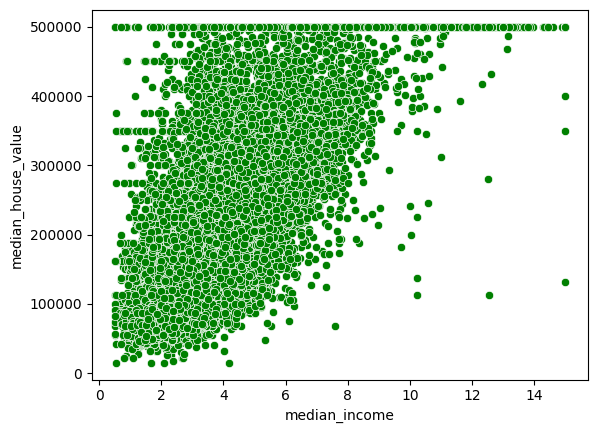

In [28]:
# YOUR CODE HERE
seaborn.scatterplot(data=df_housing, x='median_income', y='median_house_value', color = 'green')

## Task 5: Visualize Geographical Data
We want to see how the median house values spread out over the locations (longtitude, latitude) and population.

Create the following plot. Your figure should look similar (though not necessarily identical)

![Task 5](./images/task5.png)


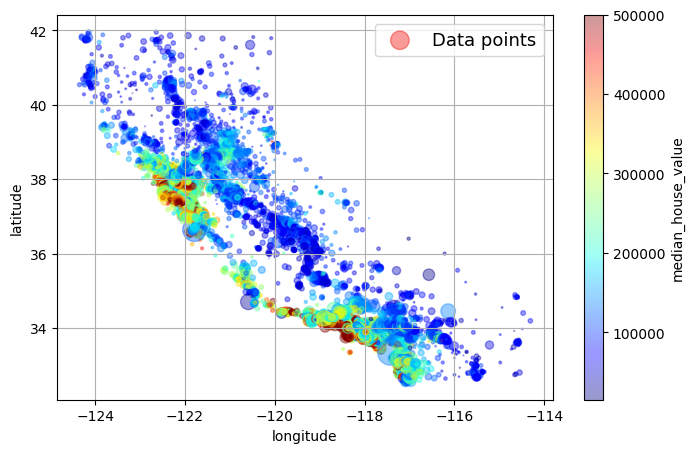

In [29]:
# YOUR CODE HERE


df_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
         s=df_housing["population"]/100, figsize=(8,5), 
         c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
         sharex=False, label="Data points")

plt.grid()
plt.legend()


#taskfive = df_housing[['median_house_value','longitude','latitude']]
#taskfive.head()

#seaborn.scatterplot(data=task, x='longitude', y='latitude',
                    #c = df_housing['median_house_value'],
                    #size = df_housing['population'],
                   #hue = df_housing['median_house_value'])